In [13]:
from agent import Agent 
from unityagents import UnityEnvironment

import numpy as np
import time
import matplotlib.pyplot as plt
import torch

# Testing notebook 
## Recreate the example 

In [2]:
# env = UnityEnvironment(file_name='Reacher.app')
env = UnityEnvironment(file_name='Reacher2.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print(f"Total score for each agent: {rewards}")

## Test the agent

In [6]:
# def train_agent(agent, n_episodes=300, windows=[10, 100]):
#     """
#     Training the agent
#     """
#     scores = []
#     avg_score = -np.inf
#     max_avg_score = -np.inf
#     start = time.perf_counter()

#     win1, win2 = windows

#     for i in range(n_episodes):
#         info = env.reset(train_mode=True)[brain_name]
#         agent.reset()
#         state = info.vector_observations[0]
#         score = 0 

#         while True:
#             action = agent.act(state)      
#             info = env.step(action)[brain_name]
            
#             next_state = info.vector_observations[0]
#             reward = info.rewards[0]
#             done = info.local_done[0]
#             score += reward
            
#             agent.step(state, action, reward, next_state, done)

#             state = next_state

#             if done:
#                 break 

#         scores.append(score)

#         if len(scores) > 99:
#             avg_score = np.mean(scores[-100:])
#             max_avg_score = max(avg_score, max_avg_score)
            
#         now = time.perf_counter() - start
#         print(f"\r{int(now/60):02d}:{int(now%60):02d} Episode {i+1}/{n_episodes}, Max Avg: {max_avg_score:.4f}, Avg: {avg_score:.4f}, Current: {score:.4f}", end="")
        
#         # Set limit above requirement for good measure
#         if avg_score > 30:
#             print(f"\nSuccess, avg score of {avg_score:.2f} after {i} episodes")
#             break 
            
#     avg_1 = [np.nan for _ in range(win1 - 1)]
#     avg_2 = [np.nan for _ in range(win2 - 1)]

#     for i in range(len(scores) - win1 + 1):
#         avg_1.append(np.mean(scores[i:i+win1]))

#     for i in range(len(scores) - win2 + 1):
#         avg_2.append(np.mean(scores[i:i+win2]))

#     plt.plot(scores, label="Individual")
#     plt.plot(avg_1, label=f"Avg_Window = {win1}")
#     plt.plot(avg_2, label=f"Avg_window = {win2}")
#     plt.xlabel("episode")
#     plt.ylabel("score")
#     plt.legend()
#     plt.savefig("ouput_rewards.png")
#     plt.show()

In [7]:
# # Run overnight, see how it goes 
# agent = Agent(state_size, action_size, seed=10)
# train_agent(agent)

In [8]:
# env.close()

## Try 20 Agent

In [9]:
def train_agent2(agent, n_episodes=400, windows=[10, 100], scores=[]):
    """
    Training the agent
    """
    avg_score = -np.inf
    max_avg_score = -np.inf
    start = time.perf_counter()

    win1, win2 = windows

    for i in range(n_episodes):
        info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        states = info.vector_observations
        score = 0 

        while True:
            actions = agent.act(states)
            info = env.step(actions)[brain_name]
            
            next_states = info.vector_observations
            rewards = info.rewards
            dones = info.local_done
            
            score += np.mean(rewards)
            
            agent.step(states, actions, rewards, next_states, dones)

            states = next_states

            if np.any(dones):  
                break

        scores.append(score)

        avg_score = np.mean(scores[-100:])
        if len(scores) > 99:
            max_avg_score = max(avg_score, max_avg_score)
            
        now = time.perf_counter() - start
        print(f"\r{int(now/60):02d}:{int(now%60):02d} Episode {i+1}/{n_episodes} | Max Avg: {max_avg_score:.2f} | 100 Avg: {avg_score:.2f} | 10 Avg: {np.mean(scores[-10:]):.2f}", end="")
        
        # Set limit above requirement for good measure
        if avg_score > 30:
            print(f"\nSuccess, avg score of {avg_score:.2f} after {i} episodes")
            break 
            
    avg_1 = [np.nan for _ in range(win1 - 1)]
    avg_2 = [np.nan for _ in range(win2 - 1)]

    for i in range(len(scores) - win1 + 1):
        avg_1.append(np.mean(scores[i:i+win1]))

    for i in range(len(scores) - win2 + 1):
        avg_2.append(np.mean(scores[i:i+win2]))

    plt.plot(scores, label="Individual")
    plt.plot(avg_1, label=f"Avg_Window = {win1}")
    plt.plot(avg_2, label=f"Avg_window = {win2}")
    plt.xlabel("episode")
    plt.ylabel("score")
    plt.legend()
    plt.savefig("ouput_rewards.png")
    plt.show()
    
    return scores

Seed: 1886783
101:15 Episode 308/400 | Max Avg: 30.01 | 100 Avg: 30.01 | 10 Avg: 31.63
Success, avg score of 30.01 after 307 episodes


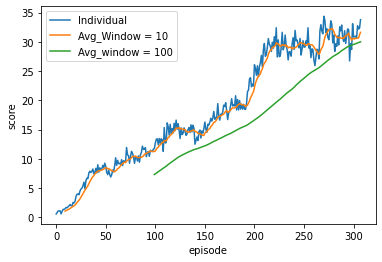

In [10]:
seed = np.random.randint(2e6)
print(f"Seed: {seed}")
agent = Agent(state_size, action_size, seed=seed, multi=True)
score = train_agent2(agent)

## Save Params

In [17]:
torch.save(agent.local_actor.state_dict(), "model_weights/act_local.trch")
torch.save(agent.target_actor.state_dict(), "model_weights/act_target.trch")

torch.save(agent.local_critic.state_dict(), "model_weights/crit_local.trch")
torch.save(agent.target_critic.state_dict(), "model_weights/crit_target.trch")

In [19]:
# Test loading 
agent2 = Agent(state_size, action_size, seed=seed, multi=True)

agent2.local_actor.load_state_dict(torch.load("model_weights/act_local.trch"))
agent2.target_actor.load_state_dict(torch.load("model_weights/act_target.trch"))
agent2.local_critic.load_state_dict(torch.load("model_weights/crit_local.trch"))
agent2.target_critic.load_state_dict(torch.load("model_weights/crit_target.trch"))

In [24]:
# Watch trained agent
env_info = env.reset(train_mode=False)[brain_name]    
states = env_info.vector_observations                 

for i in range(2):
    scores = [0 for _ in range(20)]

    while True:
        actions = agent2.act(states, inc_noise=False)

        env_info = env.step(actions)[brain_name]          
        next_states = env_info.vector_observations        
        rewards = env_info.rewards                        
        dones = env_info.local_done   
        
        scores = [scores[j] + env_info.rewards[j] for j in range(20)]
        states = next_states   
        
        if np.any(dones):                                 
            break
    print(f"Mean scores from group {i+1}: {np.mean(scores)}")

Mean scores from group 1: 32.36649927655235
Mean scores from group 2: 31.78449928956106
